In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
from tqdm.auto import tqdm
import pickle

# Read Data

## Data In the paper

In [2]:
df1 = pd.DataFrame({"MSE(prediction loss)": [1.62754025, 1.54669192, 1.54386152, 1.54115537, 1.56645827,
       1.57698874, 1.56944011, 1.57006192, 1.58557114, 1.6003949 ,
       1.61110216, 1.6179375 , 1.61949956, 1.63199004],
      "Regret(decision loss)": [4.58451976, 3.48727992, 3.10240388, 3.06158316, 2.80737287,
       2.68007363, 2.74254205, 2.6854306 , 2.60907167, 2.52026119,
       2.55220876, 2.47159844, 2.39866596, 2.34872858]})

In [3]:
df2 = pd.DataFrame({"MSE(prediction loss)": [1.437779,1.427697,1.423450,1.420974,1.419513,1.418321,1.417363,1.416587,1.415957,1.415561,1.415076,1.414844,1.414703, 1.414565],
      "Regret(decision loss)": [4.767364,4.834282,4.848618,4.850615,4.847850,4.841355,4.828261,4.811556,4.797685,4.781215,4.763682,4.745305,4.726755, 4.706504],})

## If you want to read data from disk

In [4]:
# with open("data/2ST/MLP/1/0output.dict", 'rb') as f:
#     data = pickle.load(f)
# df2 = pd.DataFrame({"MSE(prediction loss)": data['train_mse'],
#       "Regret(decision loss)": data['train_regret'],})

# with open("data/E2E/MLP/3/0output.dict", 'rb') as f:
#     data = pickle.load(f)
# df1 = pd.DataFrame({"MSE(prediction loss)": data['train_mse'],
#       "Regret(decision loss)": data['train_regret'],})

## align data

In [5]:
min_len = min(len(df1), len(df2))

In [6]:
df1 = df1.iloc[:min_len]
df2 = df2.iloc[:min_len]

# 画图

In [7]:
def change_fs(font_size):
    font_size = font_size
    plt.rc('font', size=font_size)        # controls default text sizes
    plt.rc('axes', titlesize=font_size)   # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)   # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)  # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size)  # legend fontsize
    plt.rc('figure', titlesize=font_size) # fontsize of the figure title

In [8]:
def plt_df(df, name):
    sns.set_style("whitegrid", {'axes.grid' : False})
    df.index.name = 'epoch'
    ax = df.plot(y="MSE(prediction loss)", legend=False)
    ax.set_ylabel('MSE(prediction loss)')

    ax.set_ylim(1.41, 1.64)
    # ax.set_ylim(0.99, 1.06)

    ax2 = ax.twinx()
    
    ax2.set_ylim(2.3, 4.9)
    # ax2.set_ylim(14.6, 15.9)
    # ax2.set_ylim(13.2, 15.9)

    df.plot(y="Regret(decision loss)", ax=ax2, legend=False, color='r', style='-.')
    ax2.set_ylabel("Regret(decision loss)")
    ax.figure.legend(loc='center')
    plt.savefig(f"{name}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

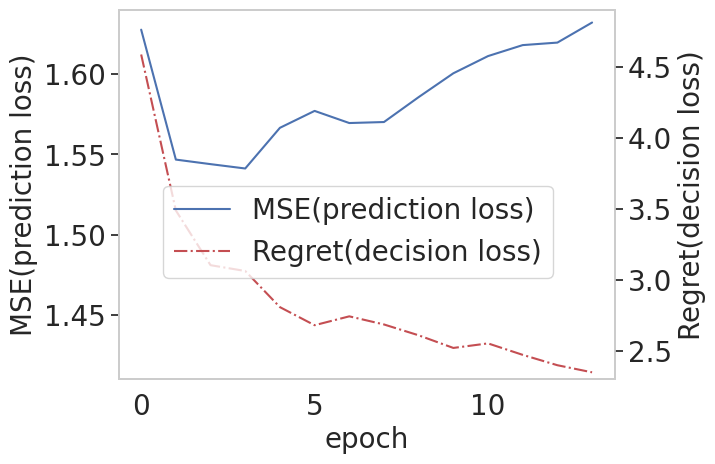

In [9]:
change_fs(20)
plt_df(df1, 'ppname')

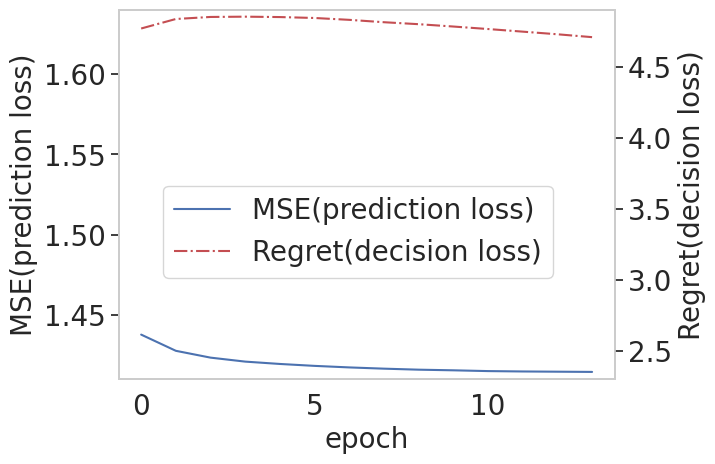

In [10]:
change_fs(20)
plt_df(df2, 'twostage')